# Simple Liner Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
import tensorflow as tf

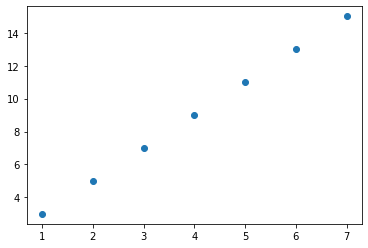

In [2]:
# y = 2x + 1
x_data = [1, 2, 3, 4, 5, 6, 7]
y_data = [3, 5, 7, 9, 11, 13 ,15]
plt.plot(x_data, y_data, 'o')

## 1. scikit-learn

In [3]:
x_train = x_data[:5]
y_train = y_data[:5]
x_test = x_data[5:]
y_test = y_data[5:]

x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [4]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [5]:
print(reg.coef_)
print(reg.intercept_)
print(reg.score(x_train, y_train))

[2.]
0.9999999999999982
1.0


In [6]:
reg.predict(x_test)

array([13., 15.])

## 2. TensorFlow

In [7]:
# initialize W, b
W = tf.Variable(3.0)
b = tf.Variable(3.0)

# set hypothesis and define cost func.
hypothesis = W * x_train + b
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

In [8]:
learning_rate = 0.01

In [9]:
# update W, b
for i in range(100):
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_train + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_train))
    W_grad, b_grad = tape.gradient(cost, [W, b])    # d(cost)/dW, d(cost)/db
    W.assign_sub(learning_rate * W_grad)    # W = learning_rate * W_grad
    b.assign_sub(learning_rate * b_grad)    # b = learning_rate * b_grad
    if i % 10 == 0:
        print("{:5}    |{:10.4f}    |{:10.4f}    |{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0    |    2.5800    |    2.9000    | 51.000000
   10    |    1.2875    |    2.7023    | 11.601850
   20    |    1.1635    |    2.8230    | 11.200728
   30    |    1.1193    |    2.9605    | 10.990364
   40    |    1.0817    |    3.0950    | 10.794520
   50    |    1.0456    |    3.2250    | 10.611504
   60    |    1.0108    |    3.3507    | 10.440475
   70    |    0.9771    |    3.4722    | 10.280645
   80    |    0.9446    |    3.5897    | 10.131284
   90    |    0.9131    |    3.7033    |  9.991705


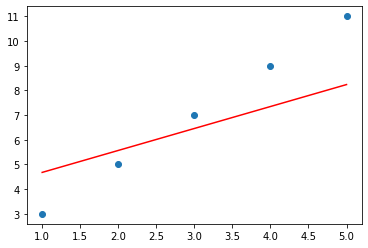

In [10]:
plt.plot(x_train, y_train, 'o')
plt.plot(x_train, hypothesis.numpy(), 'r-')

### Discussion
- What I want is W=2, b=1 (for y = 2x + 1)
- but, the results varies with respect to the initial values of W, b, learning rate

### 2.1. Gradient descent (pure Python)

In [11]:
def cost_func(W, X, Y, b):
    cost = 0
    for i in range(len(X)):
        cost += (W * X[i] + b - Y[i]) ** 2
    return cost / len(X)

b = 1
for feed_W in np.linspace(-5, 5, 11):
    curr_cost = cost_func(feed_W, x_train, y_train, b)
    print("{:6.2f}    |{:10.2f}".format(feed_W, np.float64(curr_cost)))

 -5.00    |    539.00
 -4.00    |    396.00
 -3.00    |    275.00
 -2.00    |    176.00
 -1.00    |     99.00
  0.00    |     44.00
  1.00    |     11.00
  2.00    |      0.00
  3.00    |     11.00
  4.00    |     44.00
  5.00    |     99.00


### 2.2. Gradient descent (TensorFlow)

In [12]:
tf.random.set_seed(0) # for reproducibility
W = tf.Variable(tf.random.normal([1], -100., 100.))
for step in range(150):
    hypothesis = W * x_train + 2
    cost = tf.reduce_mean(tf.square(hypothesis - y_train))
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, x_train) - y_train, x_train))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(step, cost.numpy(), W.numpy()[0]))

    0 | 27230.1621 |  45.694572
   10 |  2788.5532 |  15.562157
   20 |   324.9137 |   6.166352
   30 |    58.1891 |   3.236578
   40 |    23.7787 |   2.323025
   50 |    17.7898 |   2.038163
   60 |    16.3833 |   1.949338
   70 |    15.9896 |   1.921641
   80 |    15.8712 |   1.913004
   90 |    15.8347 |   1.910311
  100 |    15.8233 |   1.909471
  110 |    15.8198 |   1.909210
  120 |    15.8187 |   1.909128
  130 |    15.8183 |   1.909102
  140 |    15.8182 |   1.909094
